c:\python35\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
c:\python35\lib\site-packages\ipykernel_launcher.py:56: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


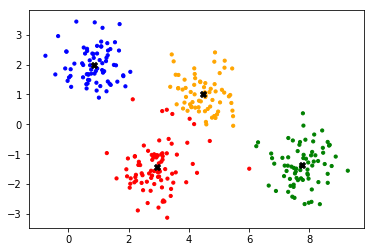

In [32]:
#K‐means Clustering Implementation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
color_4=["r","g","b","orange"]

df=pd.read_csv("cdata.csv")
axis_x,axis_y=np.array(df["x"]),np.array(df["y"]) #Take out the x and y lines of the data.

def distance(seat1,seat2): #Write a function for defining two coordinate distances
    x1,y1=seat1
    x2,y2=seat2
    d=((x1-x2)**2+(y1-y2)**2)**0.5
    return d

def data(cluster_k):
    for i in range(len(axis_x)):
        a=list(zip(axis_x,axis_y)) #Take out one coordinate  
        random.shuffle(a) #Shuffle the coordinate order
        
    m=0
    max_seat=""
    for i in range(len(a)):   #Take out the first center coordinate
        if distance(a[0],a[i])>m: #And find the point farthest from the center coordinate as the second center coordinate
            m,max_seat=distance(a[0],a[i]),a[i]
    p={}
    p["central1"],p["central2"]=a[0],max_seat #Create a dictionary to place the coordinates of center1 and center2
    
    i1=3
    while i1<=cluster_k:  #If you want to group the value smaller than the current group value
        if i1<=cluster_k:
            s1="central"+str(i1) #Create a name for the center point
        dseat={}
        dc1c2=[]    
        for i in range(len(a)):
            s=[]
            for j in list(p.keys()):
                s.append(distance(p[j],a[i]))  #Distance from one point to each center point
            dseat[a[i]]=min(s) #Take the minimum
        a1=pd.Series(list(dseat.values()),index=list(dseat.keys())).argmax()#Take the point farthest from the center point and its coordinates
        p[s1]=a1 #Dictionary adds new center coordinates                     
        i1+=1
        
    d_distance={}
    for i in list(p.keys()):
        g=[]
        for j in range(len(a)):
            g.append(distance(p[i],a[j])) #The distance between the point and each center point
        d_distance[i]=g
    dataframe=pd.DataFrame(d_distance,index=a) #Establish dataframe point coordinates and distance to each center point
    i_cluster=0
    while 1:
        dic_distribution={}  #Start assignment
        for i in range(dataframe.shape[0]): #(Look at each horizontal row)find the nearest center point to each point
            mi=dataframe.iloc[i].argmin() #The center point name where mi is the minimum
            if mi in dic_distribution:   #If the center point is already in the dictionary
                dic_distribution[mi]+=[a[i]]  #Just add the point directly to the value of the center
            else:     #if not
                dic_distribution[mi]=[a[i]] #Create a new key and add the value

        for i in list(dic_distribution.keys()): 
            x_loc,y_loc=[],[]
            for j in dic_distribution[i]:
                x_loc.append(j[0]) #Take the x value from the tuple
                y_loc.append(j[1]) #Take the y value from the tuple
            new_central_x=pd.Series(x_loc).mean() #The new center x coordinate is the average of the group x values
            new_central_y=pd.Series(y_loc).mean() #The new center y coordinate is the average of the group y values
            if p[i]==(new_central_x,new_central_y): #Check if the group center point moves
                i_cluster+=1    
            p[i]=(new_central_x,new_central_y) #Update the coordinates of the center point in the dictionary

        if i_cluster==cluster_k: #Stop if the center points of each group are not moving
            break
        else:
            i_cluster=0 #Otherwise return to zero
    SSE=0
    for i in list(dic_distribution.keys()):
        for j in dic_distribution[i]:
            SSE+=(distance(p[i],j))**2 #Calculate the error value of each point and the center point of the group (ie SSE)
        
    return p,dic_distribution,SSE
data(4)      

#1
#Plot the result of clustering
p4,dic_distribution4,sse=data(4)  #Assign values from the dictionary to the new algebra
for i in list(dic_distribution4.keys()):
    x_axis,y_axis=[],[]
    for j in dic_distribution4[i]:
        x_axis.append(j[0]) #Take the X coordinate of the point
        y_axis.append(j[1]) #Take the Y coordinate of the point
    plt.scatter(x_axis,y_axis,sizes=[10]*len(x_axis),c=color_4[int(i[-1])-1]) #I[-1] is a number because i is central1
                                                    #Draw pointS
x_axis_c,y_axis_c,=[],[]
for i in list(p4.values()):
    x_axis_c.append(i[0]) #Take the X coordinate of the point
    y_axis_c.append(i[1]) #Take the Y coordinate of the point
plt.scatter(x_axis_c,y_axis_c,c="black",marker="X") #Draw xx (center points)
plt.show()

c:\python35\lib\site-packages\ipykernel_launcher.py:57: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
c:\python35\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


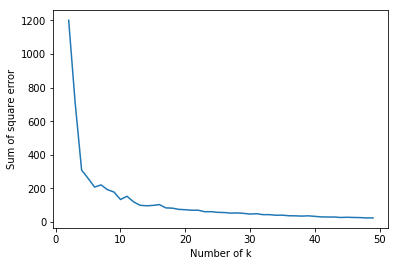

In [31]:
#2
#Plot the K value (x-axis) vs. the value of Sum of Squared Error (SSE) (y-axis)
list_SSE=[]
for i in range(2,50): #Number of groups
    list_SSE.append(data(i)[2]) #Call function and put each grouped SSE into the list
x_step=np.arange(2,50,1)
plt.plot(x_step,list_SSE)
plt.ylabel("Sum of square error")
plt.xlabel("Number of k")
plt.show()

c:\python35\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
c:\python35\lib\site-packages\ipykernel_launcher.py:57: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


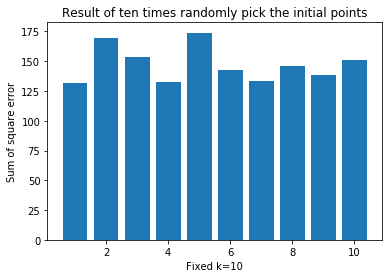

In [30]:
#3
#Try 10 times of randomly initialized centroids, and plot their SSE values (y-axis)
list_SSE10=[]
for i in range(10):
    list_SSE10.append(data(10)[2]) #Call function and put each grouped SSE into the list
x_step1=np.arange(1,11,1)
plt.bar(x_step1,list_SSE10)
plt.ylabel("Sum of square error")
plt.xlabel("Fixed k=10")
plt.title("Result of ten times randomly pick the initial points")
plt.show()